In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [4]:
print(os.listdir('summary'))
summary = pd.read_csv('summary/model.csv')
summary

['model-mse-100-10-rrrl', '.DS_Store', 'model.csv', 'model-mse-100-10-rrrl.csv', 'model_2_seiji.csv', 'model_old.csv']


,epoch,train_loss,test_loss,x_train.min,x_train.max,x_train.mean,x_train.var,x_test.min,x_test.max,x_test.mean,...,z_train[7].mean,z_train[7].var,z_train[8].min,z_train[8].max,z_train[8].mean,z_train[8].var,z_train[9].min,z_train[9].max,z_train[9].mean,z_train[9].var
0,1,0.000686,0.000688,-2.80045,2.78271,0.004942,0.006924,-2.615,2.59069,0.004922,...,1.153231,0.013010,-0.020173,-0.005885,-0.011896,0.000004,0.658549,1.176056,0.901315,0.005949
1,2,0.000355,0.000365,-2.80045,2.78271,0.004942,0.006924,-2.615,2.59069,0.004922,...,0.515554,0.006069,-0.018044,-0.001250,-0.008290,0.000006,0.250926,0.792034,0.442034,0.007504
2,3,0.000249,0.000260,-2.80045,2.78271,0.004942,0.006924,-2.615,2.59069,0.004922,...,0.279213,0.004358,-0.019789,-0.003172,-0.009582,0.000005,0.006525,0.438369,0.158111,0.004115
3,4,0.000243,0.000256,-2.80045,2.78271,0.004942,0.006924,-2.615,2.59069,0.004922,...,0.071828,0.003534,-0.019214,-0.001335,-0.008499,0.000006,-0.012085,0.374610,0.063827,0.004622
4,5,0.000233,0.000248,-2.80045,2.78271,0.004942,0.006924,-2.615,2.59069,0.004922,...,0.142697,0.005704,-0.017888,0.015113,-0.006991,0.000010,-0.014980,0.377747,0.046441,0.005298
5,6,0.000234,0.000248,-2.80045,2.78271,0.004942,0.006924,-2.615,2.59069,0.004922,...,0.078404,0.005083,-0.013749,0.074955,0.004701,0.000232,-0.020478,0.347038,0.023025,0.003987
6,7,0.000228,0.000245,-2.80045,2.78271,0.004942,0.006924,-2.615,2.59069,0.004922,...,0.089731,0.005526,-0.019909,0.025075,-0.008713,0.000017,-0.018421,0.453999,0.050989,0.007822
7,8,0.000219,0.000234,-2.80045,2.78271,0.004942,0.006924,-2.615,2.59069,0.004922,...,0.076265,0.006053,-0.026898,0.010022,-0.011058,0.000022,-0.019111,0.513884,0.059872,0.010089
8,9,0.000218,0.000234,-2.80045,2.78271,0.004942,0.006924,-2.615,2.59069,0.004922,...,0.067428,0.006229,-0.023822,0.045236,-0.004811,0.000055,-0.019113,0.476018,0.046029,0.008525
9,10,0.000217,0.000231,-2.80045,2.78271,0.004942,0.006924,-2.615,2.59069,0.004922,...,0.056991,0.005946,-0.020762,0.076094,0.002516,0.000266,-0.020813,0.527255,0.060269,0.011504


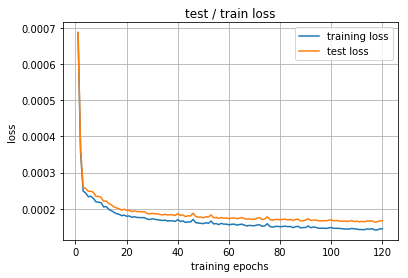

In [5]:
fig, ax = plt.subplots()
ax.plot(summary['epoch'], summary[' train_loss'], label='training loss')
ax.plot(summary['epoch'], summary[' test_loss'], label='test loss')
ax.set(xlabel='training epochs', ylabel='loss', title='test / train loss')
ax.legend()
ax.grid()

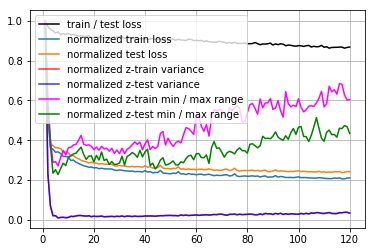

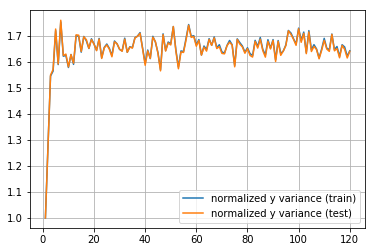

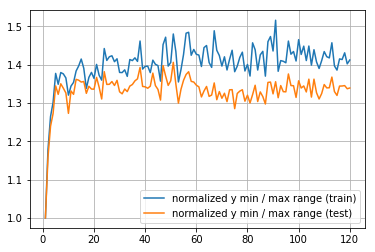

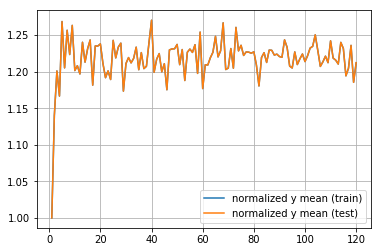

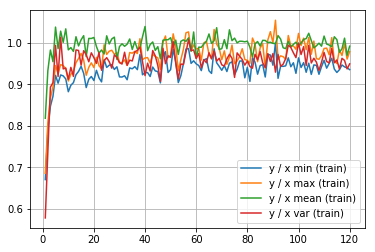

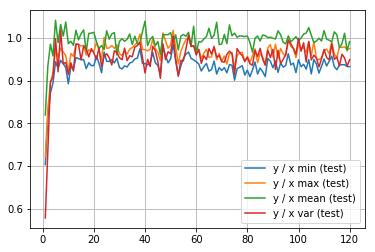

In [6]:
fig, ax = plt.subplots()
t0 = np.max(summary[' train_loss'])
z0 = np.max(summary[' z_train.var'])
zr0 = np.max(summary[' z_train.max'] - summary[' z_train.min'])
ax.plot(summary['epoch'], summary[' train_loss'] / summary[' test_loss'], label='train / test loss', alpha=1.0, color='black')
ax.plot(summary['epoch'], summary[' train_loss'] / t0, label='normalized train loss')
ax.plot(summary['epoch'], summary[' test_loss'] / t0, label='normalized test loss')
ax.plot(summary['epoch'], summary[' z_train.var'] / z0, label='normalized z-train variance', alpha=0.8, color='red')
ax.plot(summary['epoch'], summary[' z_train.var'] / z0, label='normalized z-test variance', alpha=0.8, color='blue')
ax.plot(summary['epoch'], (summary[' z_train.max'] - summary[' z_train.min']) / zr0, label='normalized z-train min / max range', alpha=1.0, color='magenta')
ax.plot(summary['epoch'], (summary[' z_test.max'] - summary[' z_test.min']) / zr0, label='normalized z-test min / max range', alpha=1.0, color='green')
ax.grid()
ax.legend()

fig, ax = plt.subplots()

ytrv = summary[' y_train.var']
ytev = summary[' y_test.var']

ytrr = summary[' y_train.max'] - summary[' y_train.min']
yter = summary[' y_test.max'] - summary[' y_test.min']

ytrm = summary[' y_train.mean']
ytem = summary[' y_train.mean']

ax.plot(summary['epoch'], ytrv / ytrv[0], label='normalized y variance (train)')
ax.plot(summary['epoch'], ytev / ytev[0], label='normalized y variance (test)')
ax.grid()
ax.legend()
fig, ax = plt.subplots()


ax.plot(summary['epoch'], ytrr / ytrr[0], label='normalized y min / max range (train)')
ax.plot(summary['epoch'], yter / yter[0], label='normalized y min / max range (test)')
ax.grid()
ax.legend()
fig, ax = plt.subplots()


ax.plot(summary['epoch'], ytrm / ytrm[0], label='normalized y mean (train)')
ax.plot(summary['epoch'], ytem / ytem[0], label='normalized y mean (test)')
ax.grid()
ax.legend()

fig, ax = plt.subplots()
ax.plot(summary['epoch'], summary[' y_train.min'] / summary[' x_train.min'], label='y / x min (train)')
ax.plot(summary['epoch'], summary[' y_train.max'] / summary[' x_train.max'], label='y / x max (train)')
ax.plot(summary['epoch'], summary[' y_train.mean'] / summary[' x_train.mean'], label='y / x mean (train)')
ax.plot(summary['epoch'], summary[' y_train.var'] / summary[' x_train.var'], label='y / x var (train)')
ax.grid()
ax.legend()

fig, ax = plt.subplots()
ax.plot(summary['epoch'], summary[' y_test.min'] / summary[' x_test.min'], label='y / x min (test)')
ax.plot(summary['epoch'], summary[' y_test.max'] / summary[' x_test.max'], label='y / x max (test)')
ax.plot(summary['epoch'], summary[' y_test.mean'] / summary[' x_test.mean'], label='y / x mean (test)')
ax.plot(summary['epoch'], summary[' y_test.var'] / summary[' x_test.var'], label='y / x var (test)')
ax.grid()
ax.legend()

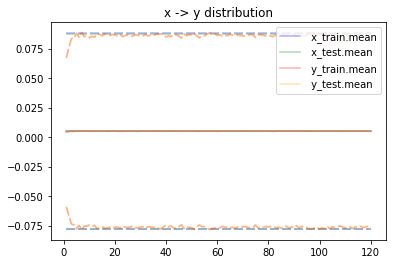

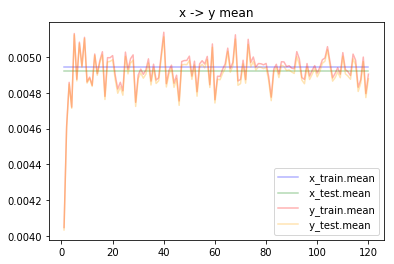

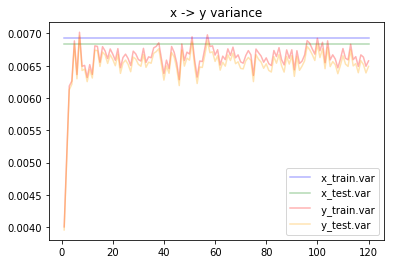

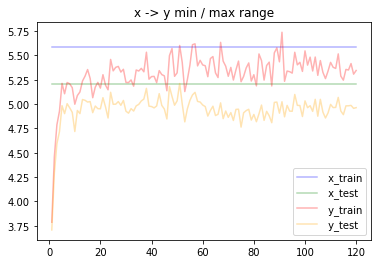

In [7]:

def plot_distribution (ax, value, color):
    label = value.strip()
    x, min_, max_, mean_, var_ = summary['epoch'], summary['%s.min'%value], summary['%s.max'%value], summary['%s.mean'%value], summary['%s.var'%value]
    stdev = var_ ** 0.5
#     ax.plot(x, min_, color=color, alpha=0.3)
#     ax.plot(x, max_, color=color, alpha=0.3)
    ax.plot(x, mean_, color=color, alpha=0.3)
    ax.plot(x, mean_ + stdev, color=color, alpha=0.3, dashes=[6,2])
    ax.plot(x, mean_ - stdev, color=color, alpha=0.3, dashes=[6,2])

def plot_means (ax, value, color):
    label = value.strip()
    x, min_, max_, mean_, var_ = summary['epoch'], summary['%s.min'%value], summary['%s.max'%value], summary['%s.mean'%value], summary['%s.var'%value]
    ax.plot(x, mean_, color=color, alpha=0.3)

def plot_vars (ax, value, color):
    label = value.strip()
    x, min_, max_, mean_, var_ = summary['epoch'], summary['%s.min'%value], summary['%s.max'%value], summary['%s.mean'%value], summary['%s.var'%value]
    ax.plot(x, var_, color=color, alpha=0.3)
    
def plot_range (ax, value, color):
    label = value.strip()
    x, min_, max_, mean_, var_ = summary['epoch'], summary['%s.min'%value], summary['%s.max'%value], summary['%s.mean'%value], summary['%s.var'%value]
    ax.plot(x, max_ - min_, label=value, color=color, alpha=0.3)

fig, ax = plt.subplots()
ax.set(title='x -> y distribution')
plot_distribution(ax, ' x_train', color='blue')
plot_distribution(ax, ' x_test', color='green')
plot_distribution(ax, ' y_train', color='red')
plot_distribution(ax, ' y_test', color='orange')
ax.legend()

fig, ax = plt.subplots()
ax.set(title='x -> y mean')
plot_means(ax, ' x_train', color='blue')
plot_means(ax, ' x_test', color='green')
plot_means(ax, ' y_train', color='red')
plot_means(ax, ' y_test', color='orange')
ax.legend()

fig, ax = plt.subplots()
ax.set(title='x -> y variance')
plot_vars(ax, ' x_train', color='blue')
plot_vars(ax, ' x_test', color='green')
plot_vars(ax, ' y_train', color='red')
plot_vars(ax, ' y_test', color='orange')
ax.legend()

fig, ax = plt.subplots()
ax.set(title='x -> y min / max range')
plot_range(ax, ' x_train', color='blue')
plot_range(ax, ' x_test', color='green')
plot_range(ax, ' y_train', color='red')
plot_range(ax, ' y_test', color='orange')
ax.legend()

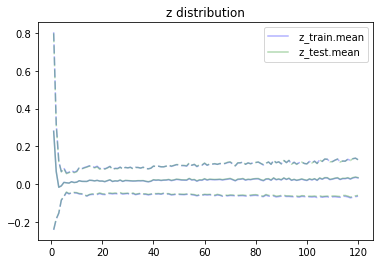

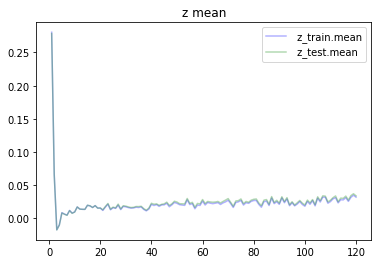

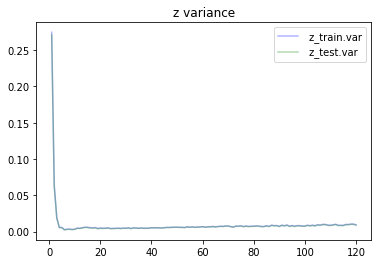

In [8]:
fig, ax = plt.subplots()
ax.set(title='z distribution')
plot_distribution(ax, ' z_train', color='blue')
plot_distribution(ax, ' z_test', color='green')
ax.legend()

fig, ax = plt.subplots()
ax.set(title='z mean')
plot_means(ax, ' z_train', color='blue')
plot_means(ax, ' z_test', color='green')
ax.legend()

fig, ax = plt.subplots()
ax.set(title='z variance')
plot_vars(ax, ' z_train', color='blue')
plot_vars(ax, ' z_test', color='green')
ax.legend()

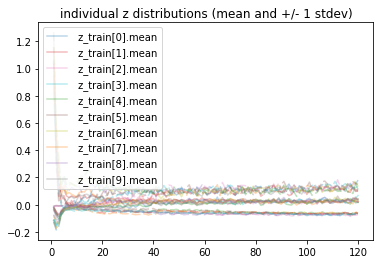

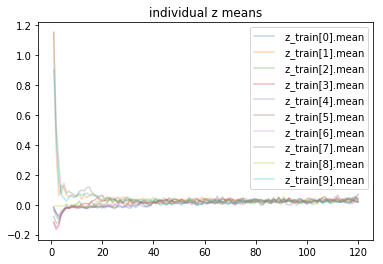

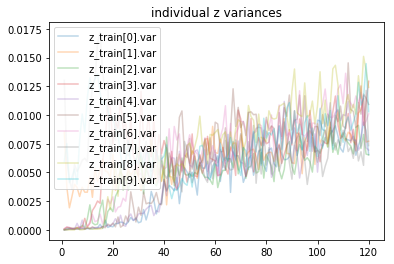

In [9]:
fig, ax = plt.subplots()
ax.set(title='individual z distributions (mean and +/- 1 stdev)')
for i in range(10):
    plot_distribution(ax, ' z_train[%s]'%i, color=None)
ax.legend()
    
fig, ax = plt.subplots()
ax.set(title='individual z means')
for i in range(10):
    plot_means(ax, ' z_train[%s]'%i, color=None)
ax.legend()

fig, ax = plt.subplots()
ax.set(title='individual z variances')
for i in range(10):
    plot_vars(ax, ' z_train[%s]'%i, color=None)
ax.legend()